<div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 80% ; height: 250px">
        <div style="position: relative ; top: 10% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%"
                 > Mécanique du point matériel
            </div>
            <div style="font-size: x-large ; padding-top: 20px ; color: rgba(255 , 0 , 0 , 0.8)"
                 > Dynamique | Ballistique
             </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.6)"
                 > Université Bretagne Sud, Lorient, France
             </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 255 , 0.7)"
                 > L1 Mécanique, UE SDI 1102
             </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.6)"
                 > Auteur : Prof. Vincent Keryvin
             </div>
        </div>
    </div>

---
# Préambule
---

## Sources

- UBS : Exercice 4 des TD de dynamique

## Signification des bibliothèques

- numpy
    > The fundamental package for scientific computing with Python

## Import des bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wid
%matplotlib widget

In [2]:
#plt.rc('text', usetex=True)

---
# Equations disponibles
---

## Saut

- $\mathcal{B_0} = (\vec{\imath}, \vec{\jmath})$ : base cartésienne fixe

- Conditions initiales : 
    - t=0
    - x(0) = 0
    - y(0) = 0
    - $\dot{x}$(0) = $V_0\cos\alpha$
    - $\dot{y}$(0) = $V_0\sin\alpha$
- Accélération
$
\vec{a}(t) = \left (
\begin{array}{lcl}
 \ddot{x}(t) & = & 0\\
 \ddot{y}(t) & = & -g
\end{array}
\right )_{\mathcal{B_0}}
$


- Vitesse
$
\vec{v}(t) = \left (
\begin{array}{lcl}
 \dot{x}(t) & = &  V_0\cos\alpha\\
 \dot{y}(t) & = &  -gt + V_0\sin\alpha 
\end{array}
\right )_{\mathcal{B_0}}
$


- Position
$
\vec{OM}(t) = \left (
\begin{array}{lcl}
 x(t) & = & V_0\cos\alpha t\\
 y(t) & = & -\frac{1}{2}gt^2 + V_0\sin\alpha t
\end{array}
\right )_{\mathcal{B_0}}
$

- Temps de vol
$
t_v = 2V_0\sin(\alpha)/g
$

---
# Données numériques
---

## Données physiques

In [3]:
g         = 9.81                      # norme de l'accélération de la pesanteur en m/s/s

---
# Fonctions
---

## Position

In [4]:
x = lambda g, V0, alfa, t: V0*np.cos(alfa)*t
y = lambda g, V0, alfa, t: V0*np.sin(alfa)*t - g/2*t**2

## Vitesse

In [5]:
vx = lambda g, V0, alfa, t: V0*np.cos(alfa)*(1-0*t)
vy = lambda g, V0, alfa, t: V0*np.sin(alfa) - g*t

## Accélération

In [6]:
axx = lambda g,t: 0*t
ay  = lambda g, t: -g*(1-0*t)

---
# Animations
---

## Figure avec curseurs : influences de l'angle initial et de la vitesse initiale

Output()

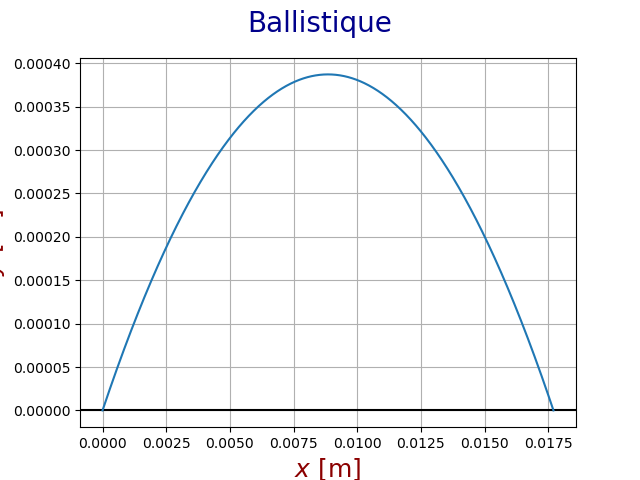

In [10]:
# Réglages du graphe
fig, axs = plt.subplots()
axs.grid()
fig.suptitle('Ballistique', color='darkblue', size=20)
axs.set_xlabel(r'$x$ [m]', color='darkred', size=18)
axs.set_ylabel(r'$y$ [m]', color='darkred', size=18)
axs.axhline(color='k')

# Définition des paramètres variables et de leur position
a = wid.FloatSlider(min=1, max=10, value=1, step=1, description="V$_0$ [m/s]")
b = wid.FloatSlider(min=0, max=90, value=5, step=5, description=r"$\alpha$ [°]")
ui = wid.VBox([a,b])

# Fonction à mettre à jour 
def update(V0,alfa):
    alfa *= np.pi/180                             # Passage degrés/radians
    tv        = 2*V0*np.sin(alfa)/g               # Temps de vol
    t = np.linspace(0,tv,1000)                    # Plage de temps
    axs.plot(x(g, V0, alfa,t), y(g, V0, alfa,t))  # Tracé
    
# Creation de l'interactivité et son affichage
w = wid.interactive_output(update, {'V0': a, 'alfa': b})
display(w,ui)